In [1]:
import pandas as pd
import numpy as np

Class1.txt and Class2.txt files in the Canvas contain two-dimensional instances in two classes (C1 and C2 respectively, 
with 100 instances in each class). The instances are not linearly separable.

In [2]:
class1 = pd.read_csv("class1.txt")
class2 = pd.read_csv("class2.txt")

posLabel = 1
negLabel = -1

class1.insert(class1.shape[1],'label',posLabel)
class2.insert(class2.shape[1],'label',negLabel)
class2.head()

# combine two classes
class12=class1.append(class2)

Q - Randomly select 80% instances from class1.txt and 80% instances from class2.txt to train a perceptron 
classifier (using gradient descent learning rule), 
and use the classifier to classify remaining 20% instances in class1.txt and class2.txt. 

In [3]:
# select 80% random instance from class1 & class2 and combine them to create training dataset
class1_train=class1.sample(frac=0.8)
class2_train=class2.sample(frac=0.8)

# training set
class12_train=class1_train.append(class2_train)

# select remaining 20% instances from class1 & class2 and combine them to create test dataset
class1_test=class1[~class1.isin(class1_train)].dropna()
class2_test=class1[~class2.isin(class2_train)].dropna()

# test set
class12_test=class1_test.append(class2_test)

X_train, y_train = class12_train.iloc[:,0:-1],class12_train.loc[:,['label']]
X_test, y_test = class12_test.iloc[:,0:-1],class12_test.loc[:,['label']]

# covert data from dataframe into matrix format for arithemetic calculation
X_train_m = np.asmatrix(X_train, dtype='float64')
X_test_m = np.asmatrix(X_test, dtype='float64')
y_train_m = np.asmatrix(y_train, dtype='float64')
y_test_m = np.asmatrix(y_test, dtype='float64')

In [4]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1) - 0.5
    
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_ = []
    epoch = 0
    err = 9999.0
    
    while( epoch < max_iter ) and ( err > err_threshold ):
        misclassified = 0
        deltaw = [0] * (features.shape[1] + 1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            diff = learning_rate * (labels[i] - v)
            deltaw = deltaw + diff * x
            
        #update weights
        #print(deltaw)
        w = w + deltaw
            
        # now calculate training error using new weights
        this_err = 0
        for i, x in enumerate(features):
            x = np.insert(x, 0, 1)
            v = np.dot(w, x.transpose())
            this_err = this_err + (labels[i] - v)*(labels[i] - v)
            
        this_err = np.ndarray.item(this_err)
        this_err = this_err/2.0
            
        #mean squared error
        err = this_err/features.shape[0]
        totalSquaredErr_.append(err)
            
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x, 0, 1)
            v = np.dot(w, x.transpose())
            this_err = this_err + (test_labels[i] - v)*(test_labels[i] - v)
        this_err = np.ndarray.item(this_err)
        this_err = this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
            
        # now calculate test classification accuracy
        this_err = 0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if(((v - T) >= 0 and test_labels[i] == negLabel)or((v - T) < 0 and test_labels[i] == posLabel)):
                this_err=this_err+1
                    
        this_err = float(this_err)
        this_err = this_err/test_features.shape[0]
        accuracy_.append(1 - this_err)
            
        #next epoch
        epoch = epoch + 1
            
    return(w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)

Q - Please report the classification accuracy of the perceptron classifier on the 20% test instances 
(using learning rate=1/(# of training samples), error threshold 0.01, and iteration numbers 2,000)

In [5]:
from statistics import mean

T = 0.1
num_iter = 2000
eta = 1 / X_train_m.shape[0]
err_threshold=0.01

w, misclassified, testError, accuracy = GradientDescentLearning(X_train_m, y_train_m, num_iter, 
                                        eta, err_threshold, X_test_m, y_test_m)

print("Classification mean Accuracy = ", mean(accuracy))
print("Classification Accuracy = ", accuracy)

Classification mean Accuracy =  0.922775
Classification Accuracy =  [0.22499999999999998, 0.0, 0.375, 0.35, 0.6, 0.6, 0.675, 0.8, 0.8, 0.8, 0.8, 0.825, 0.875, 0.875, 0.875, 0.875, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0

Q - Please report the training errors and test errors of the perceptron classifier with respect to each iteration. 
Show the two error rates on the same chart, 
where the x-axis denotes the iteration and the y-axis denotes the mean classification errors [0.5 pt]

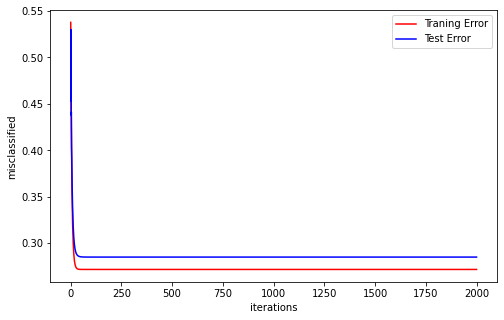

In [6]:
import matplotlib.pyplot as plt

epochs=np.arange(1, num_iter+1)
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(epochs, misclassified, color="red", label="Traning Error")
plt.plot(epochs, testError, color="blue", label="Test Error")
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.legend(loc="upper right")
plt.show()

Q - Report the final decision surface on the same scatter plot which shows the 200 instances [0.5 pt]

Weights:  [[-0.18815594 -1.55102722  1.66857768]]
0.9295505014210816 0.1726955508027547


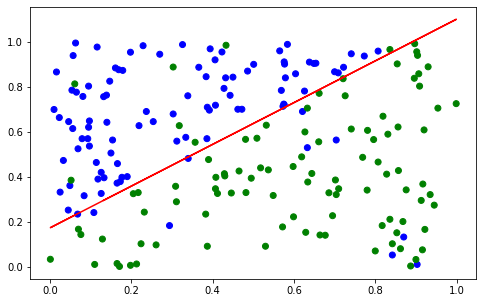

In [7]:
print("Weights: ", w)

T = 0.1
slope = w[0,1]/w[0,2]*(-1)
intercept=(T - w[0,0])/w[0,2]
print(slope,intercept)

colors=["green","black","blue"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])

xvalues = class12.iloc[:,0]
yvalues = xvalues * slope + intercept

plt.plot(xvalues, yvalues,"red")

Delta rule leanring. Which uses a signle instance to update the network weight value

In [8]:
import random

def Delta(features, labels, max_iter, learning_rate, err_threshold):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1] + 1) - 0.5
    
    totalSquaredErr_ = []
    epoch = 0
    err = 9999.0
    while (epoch < max_iter) and (err > err_threshold):
        misclassified = 0
        deltaw = [0]*(features.shape[1]+1)
        
        #random select an instance
        i = random.randrange(features.shape[0])
        x = features[i,]
        x = np.insert(x,0,1)
        v = np.dot(w, x.transpose())
        
        diff = learning_rate*(labels[i] - v)
        deltaw = deltaw + diff * x
        
        #update weights
        #print(deltaw)
        w = w + deltaw
        
        # now calculate error using new weights
        this_err = 0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err = this_err + (labels[i] - v) * (labels[i] - v)
            
        this_err = np.asscalar(this_err)
        this_err = this_err/2.0
        totalSquaredErr_.append(this_err)
        
        #mean squared error
        err = this_err/features.shape[0]
        epoch = epoch + 1
        
    return(w, totalSquaredErr_)

Q - Revise Delta learning rule in the Gradient Descent Learning Notebook to learn from the same 80% of training samples 
(using learning rate =0.01, error threshold 0.01, and iteration numbers 2,000). 

In [9]:
max_iter = 2000
eta = 0.01
err_threshold = 0.01

w, misclassified = Delta(X_train_m, y_train_m, max_iter, eta, err_threshold)
print(misclassified[0:10])

<ipython-input-8-501db01f1e56>:35: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  this_err = np.asscalar(this_err)


[110.1174887788373, 107.7175867012558, 106.57758519737904, 104.4472658128152, 102.82004097070269, 103.41159076276739, 104.0165368172459, 104.64217720463714, 105.26240045213645, 105.84982527615125]


Q - Report the training errors as a plot, where the x-axis denotes the iteration 
and the y-axis denotes the mean classification errors

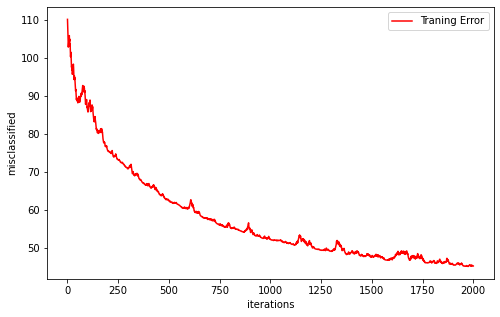

In [10]:
epochs=np.arange(1, num_iter+1)
plt.plot(epochs, misclassified, color="red", label="Traning Error")
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.legend(loc="upper right")
plt.show()

Q - Compare Delta learning rule and Gradient Descent Learning rule, 
explain advantage and disadvantage of each of them, respectively 

Delta learning rule:
Weight updating is based of single random instance and updated weights are used for calculating E(w).
Therefor processing very fast.
Selected random instance may be outlier therefor weights updating and E(W) goes up and down.

Gradient Descent Learning rule:
Weight updating is based of entire training instances and then updated weights are used for calculating E(W).
Since all training instances are used, processing is very slow.
Once the training error reaches to minimum, it stays to minimum in consequent iterations.